In [12]:
import pyccl as ccl
from utils import *
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import os
import emcee
import sys
import numpy as np
import pickle

In [13]:
box = 'Box_n50_0_1400'
cosmos_f = open('data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

In [36]:
cosmo = cosmo_params[box]
h = cosmo['H0']/100
cosmo_dict = {
    'h': h,
    'Omega_b': cosmo['ombh2'] / h**2,
    'Omega_c': cosmo['omch2'] / h**2,
    'w0': cosmo['w0'],
    'wa': 0.0,
    'A_s': cosmo['As'] * 10**-9,
    'm_nu': cosmo['nu_mass_ev'],
    'm_nu_type': 'equal',
    'T_CMB': 2.7255, 
    'n_s': cosmo['ns'],
#     'N_ur': 0.00641,
#     'N_ncdm': 1,
#     'deg_ncdm': 3,
}

In [37]:
cosmo = ccl.Cosmology(**cosmo_dict)

In [44]:
# Array of masses
m_arr = np.geomspace(1e10,1e15,128)

# Array of redshifts
z_arr = np.linspace(0.,2.,16)

In [45]:
hmf = ccl.halos.MassFuncTinker08(cosmo)

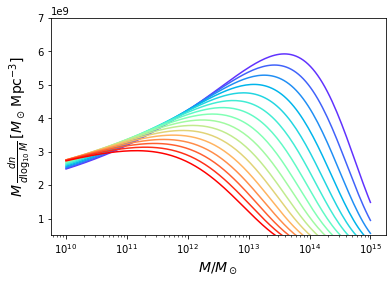

In [56]:
plt.figure()
color = dict(zip(z_arr,[plt.colormaps["rainbow"]((i+1)/len(z_arr)) for i in range(len(z_arr))]))
for z in z_arr:
    nm = hmf.get_mass_function(cosmo, m_arr, 1./(1+z))
    plt.plot(m_arr,
             m_arr * nm, c=color[z])
plt.xscale('log')
plt.ylim([5E8,7E9])
plt.xlabel(r'$M/M_\odot$',fontsize=14)
plt.ylabel(r'$M\,\frac{dn}{d\log_{10}M}\,[M_\odot\,{\rm Mpc}^{-3}]$',
           fontsize=14);